In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1BIN-nuGdcnTDiMnITlgcoZeR8DH8lEh0'})
downloaded.GetContentFile('train.csv') 

In [ ]:
downloaded = drive.CreateFile({'id':'1f0TAIRtMZTMIDGm33mPJMlm8rqYx_AcJ'})
downloaded.GetContentFile('test.csv') 

In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime as DT
from datetime import timedelta
from datetime import datetime
%matplotlib inline
import re

In [ ]:
# loading data

train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')

In [ ]:
train.isna().sum()

donorID         0
amount          5
number          5
recency         5
since_first     5
zipcode         0
gender          0
language        0
age             0
frequency       5
avg_donation    5
response        5
amount_class    5
result          0
dtype: int64

In [ ]:
train.head(3)

,donorID,amount,number,recency,since_first,zipcode,gender,language,age,frequency,avg_donation,response,amount_class,result
0,100001,178.49,12.0,2440.0,5278.0,1861.0,F,NL,52.0,439.0,14.874167,0.0,0.0,0
1,100002,20.00,1.0,1333.0,1333.0,2260.0,M,NL,68.0,1333.0,20.000000,0.0,0.0,0
2,100004,716.22,26.0,2650.0,4812.0,1020.0,F,FR,68.0,185.0,27.546923,0.0,0.0,0


In [ ]:
train.sort_values('amount', ascending=False).head()

,donorID,amount,number,recency,since_first,zipcode,gender,language,age,frequency,avg_donation,response,amount_class,result
19469,123168,4000030.00,2.0,2979.0,3053.0,2460.0,M,NL,63.0,1526.0,2.000015e+06,0.0,1.0,0
17531,120861,2479000.00,1.0,3578.0,3578.0,9050.0,M,NL,48.0,3578.0,2.479000e+06,0.0,1.0,0
19061,122679,30120.00,4.0,2449.0,2984.0,3360.0,M,NL,75.0,746.0,7.530000e+03,0.0,1.0,0
8009,109635,13718.40,7.0,3080.0,4858.0,9100.0,F,NL,51.0,694.0,1.959771e+03,0.0,1.0,0
25824,130966,12394.68,1.0,4154.0,4154.0,2930.0,M,NL,63.0,4154.0,1.239468e+04,0.0,1.0,0


In [ ]:
train = train.dropna()
test = test.dropna()


In [ ]:
train.head(3)

,donorID,amount,number,recency,since_first,zipcode,gender,language,age,frequency,avg_donation,response,amount_class,result
0,100001,178.49,12.0,2440.0,5278.0,1861.0,F,NL,52.0,439.0,14.874167,0.0,0.0,0
1,100002,20.00,1.0,1333.0,1333.0,2260.0,M,NL,68.0,1333.0,20.000000,0.0,0.0,0
2,100004,716.22,26.0,2650.0,4812.0,1020.0,F,FR,68.0,185.0,27.546923,0.0,0.0,0


In [ ]:
train.isna().sum()

donorID         0
amount          0
number          0
recency         0
since_first     0
zipcode         0
gender          0
language        0
age             0
frequency       0
avg_donation    0
response        0
amount_class    0
result          0
dtype: int64

In [ ]:
# droping outliers in amount 
train.drop(index = [19469,17531,19061], inplace=True)

In [ ]:
# droping outliers in amount
test.drop(index= [11770,10156,11428], inplace = True)

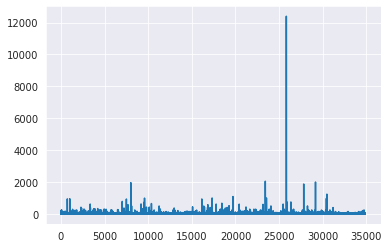

In [ ]:
train.avg_donation.plot()

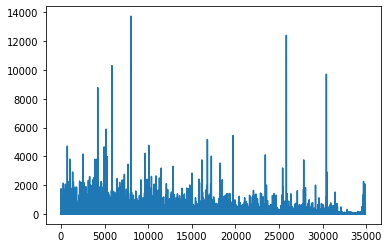

In [ ]:
train.amount.plot()

In [ ]:
mask = (train['avg_donation'] >= 1000)

In [ ]:
cols = ['recency','frequency', 'avg_donation', 'amount', 'number']
#cols_1 = [''amount', 'number', 'recency', 'since_first', 'age', 'frequency', 'avg_donation'']-- 22

X_train = train[cols]

y_train = train['result']

X_test = test[cols]

y_test = test['result']

In [ ]:
X_test.isna().sum()

recency         0
frequency       0
avg_donation    0
amount          0
number          0
dtype: int64

#### First Model Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# predict for the test dataset

y_predict = rf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


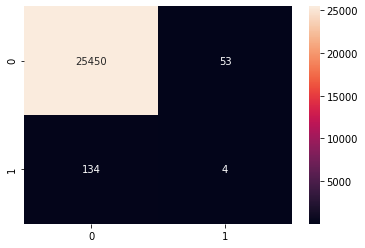

In [ ]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test,y_predict), annot=True, fmt='0.0f')

In [ ]:
# print the classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25503
           1       0.07      0.03      0.04       138

    accuracy                           0.99     25641
   macro avg       0.53      0.51      0.52     25641
weighted avg       0.99      0.99      0.99     25641



In [ ]:
# import imblearn library and resample the original data using SMOTE technique

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)

xsmote,ysmote = smote.fit_resample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# train a random forest model on SMOTE data

rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(xsmote,ysmote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

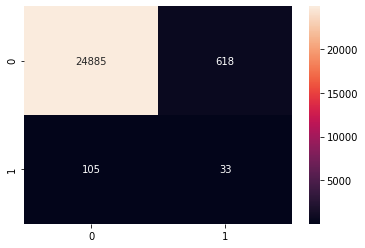

In [ ]:
# predict the classes on test data using model built on SMOTE data and plot the confusion matrix
y_predict_smote = rf_smote.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_predict_smote), annot=True, fmt='0.0f')

In [ ]:
# print the classification report

print(classification_report(y_test, y_predict_smote))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     25503
           1       0.05      0.24      0.08       138

    accuracy                           0.97     25641
   macro avg       0.52      0.61      0.53     25641
weighted avg       0.99      0.97      0.98     25641



In [ ]:
pip install plot-metric

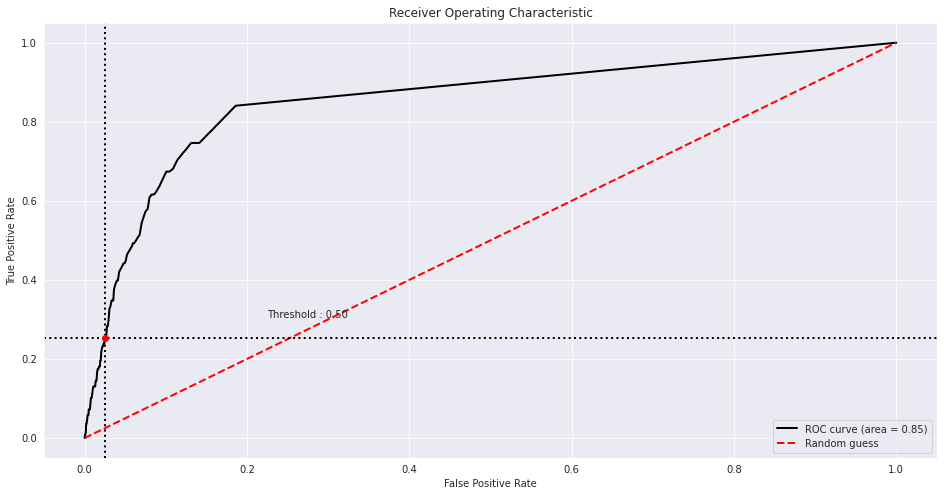

In [ ]:
# let's compute the AUC curve for the model we developed on SMOTE data

from plot_metric.functions import BinaryClassification

bc= BinaryClassification(y_test, rf_smote.predict_proba(X_test)[:, 1],labels=[0,1])
plt.figure(figsize=(16,8))
bc.plot_roc_curve()
plt.show()

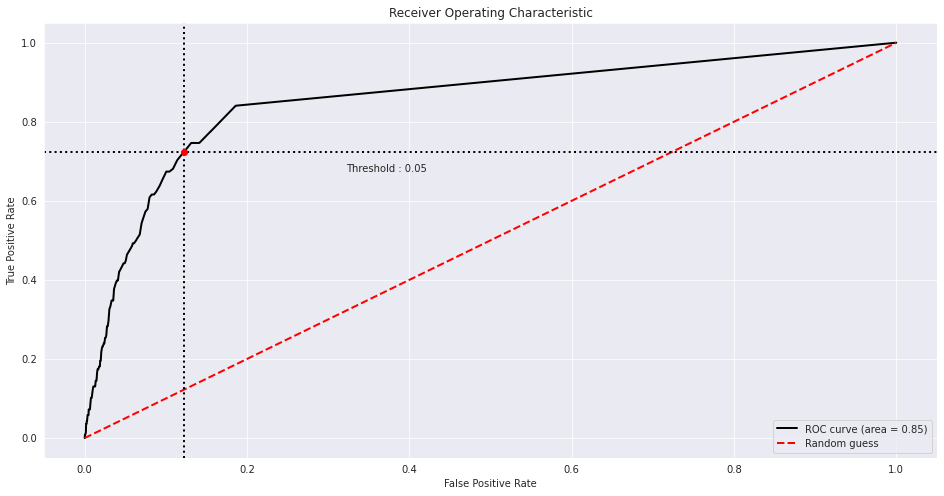

In [ ]:
# let's use another probability threshold so that we can get to the elbow position in the above curve

bc = BinaryClassification(y_test, rf_smote.predict_proba(X_test)[:,1],threshold=0.05, labels= [0,1])
plt.figure(figsize=(16,8))
bc.plot_roc_curve()
plt.show()

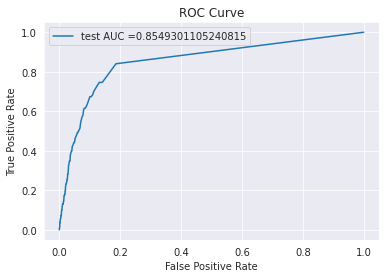

In [ ]:
from sklearn.metrics import roc_curve, auc

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred =  rf_smote.predict_proba(xsmote)[:,1]
y_test_pred = rf_smote.predict_proba(X_test)[:,1]
train_fpr, train_tpr, thresholds = roc_curve(ysmote, y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_pred)

#plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("="*100)



In [ ]:
'''

from sklearn.metrics import roc_curve, auc


rf = RandomForestClassifier(class_weight = 'balanced',n_estimators= best_est, max_depth = best_depth)
rf.fit(X_train_features_avgw2v, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_avgw2v =  rf.predict_proba(X_train_features_avgw2v)[:,1]
y_test_pred_avgw2v = rf.predict_proba(X_test_features_avgw2v)[:,1]
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_pred_avgw2v)
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_pred_avgw2v)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("="*100)

'''

'\n\nfrom sklearn.metrics import roc_curve, auc\n\n\nrf = RandomForestClassifier(class_weight = \'balanced\',n_estimators= best_est, max_depth = best_depth)\nrf.fit(X_train_features_avgw2v, y_train)\n\n# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class\n# not the predicted outputs\n\ny_train_pred_avgw2v =  rf.predict_proba(X_train_features_avgw2v)[:,1]\ny_test_pred_avgw2v = rf.predict_proba(X_test_features_avgw2v)[:,1]\ntrain_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_pred_avgw2v)\ntest_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_pred_avgw2v)\n\nplt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))\nplt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))\nplt.legend()\nplt.xlabel("False Positive Rate")\nplt.ylabel("True Positive Rate")\nplt.title("ROC Curve")\nplt.show()\n\nprint("="*100)\n\n'

### Adjusting probability threshold


In [ ]:
# compute the probabilites of test observations using rf_smote model

y_pred_prob = rf_smote.predict_proba(X_test)[:,1]

In [ ]:
# compare these probabilities against the probability threshold of 6% rather than the default threshold of 50%

y_pred_labels = (y_pred_prob  >= 0.05)

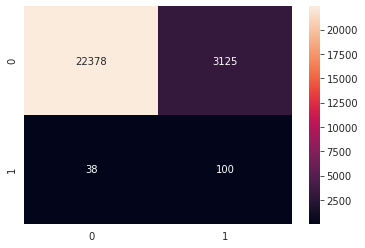

In [ ]:
# plot the confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred_labels), annot = True, fmt= '0.0f')

In [ ]:
# print the classification report
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     25503
           1       0.03      0.72      0.06       138

    accuracy                           0.88     25641
   macro avg       0.51      0.80      0.50     25641
weighted avg       0.99      0.88      0.93     25641



In [ ]:
pip install scikit-plot

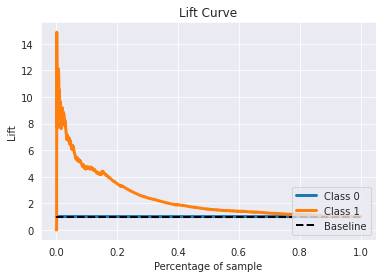

In [ ]:
import sklearn
import scikitplot as skplt

y_probas = rf.predict_proba(X_test)

skplt.metrics.plot_lift_curve(y_test, y_probas)

#### SVM 

In [ ]:
# Import SVM classifer
from sklearn import svm
from sklearn import metrics

# create svm classifier 
clf_svm = svm.SVC(kernel = 'rbf')

#Train the model 
clf_svm.fit(X_train,y_train)

#predict the response for the test
y_pred  = clf_svm.predict(X_test)

# checking teh accuracy
print("Accuracy :",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy : 0.9946179946179946
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from imblearn.over_sampling import SMOTE

smote_SVM = SMOTE(random_state = 50)

xsmote,ysmote = smote_SVM.fit_resample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# train a random forest model on SMOTE data

svm_smote = svm.SVC(kernel = 'rbf')
svm_smote.fit(xsmote,ysmote)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

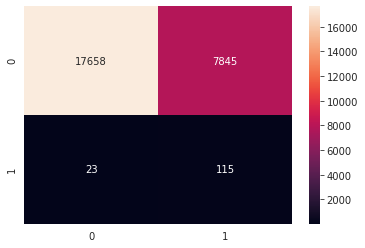

In [ ]:
# predict the classes on test data using model built on SMOTE data and plot the confusion matrix
y_predict_smote = svm_smote.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_predict_smote), annot=True, fmt='0.0f')

In [ ]:
# print the classification report

print(classification_report(y_test, y_predict_smote))

              precision    recall  f1-score   support

           0       1.00      0.69      0.82     25503
           1       0.01      0.83      0.03       138

    accuracy                           0.69     25641
   macro avg       0.51      0.76      0.42     25641
weighted avg       0.99      0.69      0.81     25641



### ANN

In [ ]:
# Importing the Keras module with packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
# Initializing the ANN
classifier = Sequential()

# Adding the input layer and first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=5))
classifier.add(Dropout(rate = 0.1))

# Adding the 2nd hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate = 0.1))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN tom the training set
classifier.fit(xsmote, ysmote, batch_size=50, epochs=30)

Epoch 1/30
1374/1374 [==============================] - 4s 3ms/step - loss: 0.6444 - accuracy: 0.6769
Epoch 2/30
1374/1374 [==============================] - 3s 2ms/step - loss: 0.5930 - accuracy: 0.7288
Epoch 3/30
1374/1374 [==============================] - 3s 3ms/step - loss: 0.5669 - accuracy: 0.7515
Epoch 4/30
1374/1374 [==============================] - 3s 3ms/step - loss: 0.5483 - accuracy: 0.7703
Epoch 5/30
1374/1374 [==============================] - 3s 2ms/step - loss: 0.5379 - accuracy: 0.7741
Epoch 6/30
1374/1374 [==============================] - 3s 2ms/step - loss: 0.5313 - accuracy: 0.7819
Epoch 7/30
1374/1374 [==============================] - 3s 2ms/step - loss: 0.5319 - accuracy: 0.7787
Epoch 8/30
1374/1374 [==============================] - 3s 2ms/step - loss: 0.5272 - accuracy: 0.7865
Epoch 9/30
1374/1374 [==============================] - 3s 2ms/step - loss: 0.5322 - accuracy: 0.7840
Epoch 10/30
1374/1374 [==============================] - 3s 2ms/step - loss: 0.525

In [ ]:
# Making the prediction and importing the model

#Predicting the Test set result
y_pred = classifier.predict(X_test)
y_pred_1 = (y_pred > 0.5)

In [ ]:
# Making a Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_1)

print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     25503
           1       0.02      0.54      0.04       138

    accuracy                           0.84     25641
   macro avg       0.51      0.69      0.48     25641
weighted avg       0.99      0.84      0.91     25641



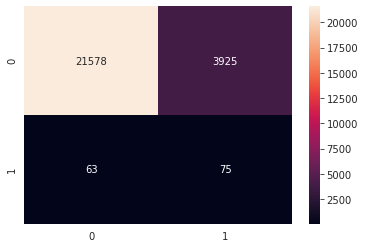

In [ ]:
# predict the classes on test data using model built on SMOTE data and plot the confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred_1), annot=True, fmt='0.0f')

In [ ]:
                                      
# EVALUATING, IMPROVING, TUNING the MODEL
# 1_EVALUATING the ANN
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=5))
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier,  batch_size=10, epochs=20)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()

# 2_IMPROVING the ANN (dropout regularization to reduce the overfitting if needed)

# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=11))
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer= optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size':[25,31],
              'epochs': [10, 35],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator= classifier, param_grid= parameters,
                           scoring= 'accuracy', cv= 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_   # 31, 500, rmsprop
best_accuracy = grid_search.best_score_


Epoch 1/20
3138/3138 [==============================] - 7s 2ms/step - loss: 0.1040 - accuracy: 0.9828
Epoch 2/20
3138/3138 [==============================] - 7s 2ms/step - loss: 0.0890 - accuracy: 0.9852
Epoch 3/20
3138/3138 [==============================] - 8s 2ms/step - loss: 0.0829 - accuracy: 0.9852
Epoch 4/20
3138/3138 [==============================] - 7s 2ms/step - loss: 0.0788 - accuracy: 0.9852
Epoch 5/20
3138/3138 [==============================] - 7s 2ms/step - loss: 0.0753 - accuracy: 0.9852
Epoch 6/20
3138/3138 [==============================] - 8s 2ms/step - loss: 0.0746 - accuracy: 0.9852
Epoch 7/20
3138/3138 [==============================] - 7s 2ms/step - loss: 0.0742 - accuracy: 0.9852
Epoch 8/20
3138/3138 [==============================] - 7s 2ms/step - loss: 0.0741 - accuracy: 0.9852
Epoch 9/20
3138/3138 [==============================] - 8s 2ms/step - loss: 0.0729 - accuracy: 0.9852
Epoch 10/20
3138/3138 [==============================] - 7s 2ms/step - loss: 0.072

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/10
Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/10
Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/10
Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/10
Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/10
Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/10
Epoch 1/10
Epoch 1/35


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/35
Epoch 1/35
Epoch 1/35


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/35
Epoch 1/35
Epoch 1/35


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/35
Epoch 1/35
Epoch 1/35


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/35
Epoch 1/35
Epoch 1/35


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/35
Epoch 1/35
Epoch 1/35


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/35
Epoch 1/35
Epoch 1/35


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/35
Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/10
Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/10
Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/10
Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/10
Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/10
Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/10
Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/35
Epoch 1/35
Epoch 1/35


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/35
Epoch 1/35
Epoch 1/35


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/35
Epoch 1/35
Epoch 1/35


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/35
Epoch 1/35
Epoch 1/35


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/35
Epoch 1/35
Epoch 1/35


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/35
Epoch 1/35
Epoch 1/35


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

Epoch 1/35
Epoch 1/35
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib

ValueError: ignored

XGBOOST

In [ ]:
pip install xgbfir

     |████████████████████████████████| 153kB 5.7MB/s 


In [ ]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
xgbc=XGBClassifier()

In [ ]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
X_test

,recency,frequency,avg_donation,amount,number
0,2727.0,463.0,14.874167,178.49,12.0
1,1620.0,1620.0,20.000000,20.00,1.0
2,2790.0,1460.0,41.456667,124.37,3.0
3,2641.0,257.0,17.198947,326.78,19.0
4,1617.0,1617.0,40.000000,40.00,1.0
...,...,...,...,...,...
25639,1042.0,1042.0,40.000000,40.00,1.0
25640,1346.0,1346.0,50.000000,50.00,1.0
25641,1512.0,1512.0,50.000000,50.00,1.0
25642,1631.0,1631.0,40.000000,40.00,1.0


In [ ]:
X_train

,recency,frequency,avg_donation,amount,number
0,2440.0,439.0,14.874167,178.49,12.0
1,1333.0,1333.0,20.000000,20.00,1.0
2,2650.0,185.0,27.546923,716.22,26.0
3,2503.0,1364.0,41.456667,124.37,3.0
4,2354.0,242.0,17.198947,326.78,19.0
...,...,...,...,...,...
34864,1225.0,1225.0,50.000000,50.00,1.0
34865,1033.0,1033.0,10.000000,10.00,1.0
34866,71.0,2396.0,62.395000,124.79,2.0
34867,1344.0,1344.0,40.000000,40.00,1.0


In [ ]:

xgbc.score(X_test, y_test)

0.9945009945009945

In [ ]:
roc_auc_score(xgbc.predict(X_test), y_test)

0.4973086824245261

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)

X_train_smt, y_train_smt = smote.fit_resample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(X_train_smt.shape)
print(y_train_smt.shape)
print(X_train.shape)
print(y_train.shape)

(68678, 5)
(68678,)
(34866, 5)
(34866,)


In [ ]:
# Scaling

from sklearn import preprocessing
print(y_train.shape)
X_train_scaled = preprocessing.scale(X_train_smt)
X_test_scaled = preprocessing.scale(X_test)

(34866,)


In [ ]:
xgbc.fit(X_train_scaled, y_train_smt)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgbc.score(X_test_scaled, y_test)

0.4921804921804922

Trying RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=50)
rf.fit(X_train_scaled,y_train_smt)

NameError: ignored

In [ ]:
rf.score(X_test_scaled, y_test)

NameError: ignored

Removing more outliers Amount >2000 dropped

In [ ]:
train.shape

(34866, 14)

In [ ]:
train = train[train['amount'] < 2000]

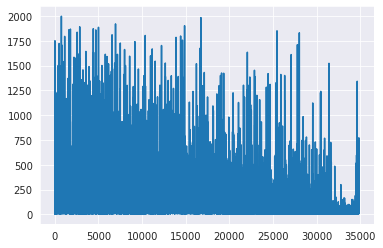

In [ ]:
train.amount.plot()

In [ ]:
cols = ['recency','frequency', 'avg_donation', 'amount', 'number']
#cols_1 = [''amount', 'number', 'recency', 'since_first', 'age', 'frequency', 'avg_donation'']-- 22

X_train = train[cols]

y_train = train['result']

X_test = test[cols]

y_test = test['result']

In [ ]:
# import imblearn library and resample the original data using SMOTE technique

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)

xsmote,ysmote = smote.fit_resample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# train a random forest model on SMOTE data

rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(xsmote,ysmote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# train a random forest model on SMOTE data

rf_smote = RandomForestClassifier(max_depth=10, random_state=42)
rf_smote.fit(xsmote,ysmote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

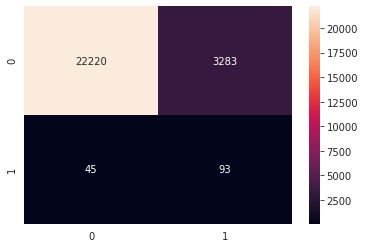

In [ ]:
# predict the classes on test data using model built on SMOTE data and plot the confusion matrix
y_predict_smote = rf_smote.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_predict_smote), annot=True, fmt='0.0f')

In [ ]:
# print the classification report

print(classification_report(y_test, y_predict_smote))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     25503
           1       0.03      0.67      0.05       138

    accuracy                           0.87     25641
   macro avg       0.51      0.77      0.49     25641
weighted avg       0.99      0.87      0.93     25641



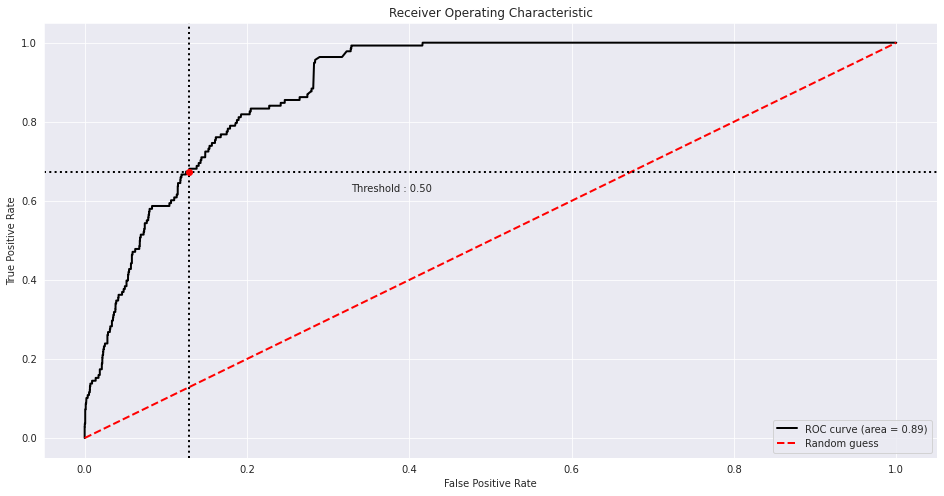

In [ ]:
# let's compute the AUC curve for the model we developed on SMOTE data

from plot_metric.functions import BinaryClassification

bc= BinaryClassification(y_test, rf_smote.predict_proba(X_test)[:, 1],labels=[0,1])
plt.figure(figsize=(16,8))
bc.plot_roc_curve()
plt.show()

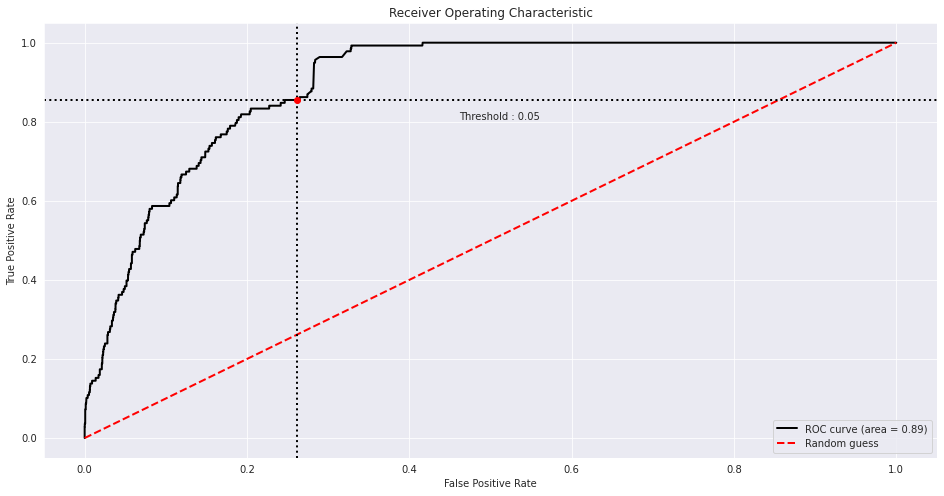

In [ ]:
# let's use another probability threshold so that we can get to the elbow position in the above curve

bc = BinaryClassification(y_test, rf_smote.predict_proba(X_test)[:,1],threshold=0.05, labels= [0,1])
plt.figure(figsize=(16,8))
bc.plot_roc_curve()
plt.show()

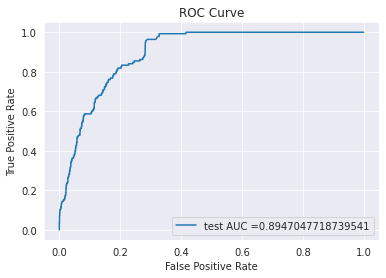

In [ ]:
from sklearn.metrics import roc_curve, auc

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred =  rf_smote.predict_proba(xsmote)[:,1]
y_test_pred = rf_smote.predict_proba(X_test)[:,1]
train_fpr, train_tpr, thresholds = roc_curve(ysmote, y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_pred)

#plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


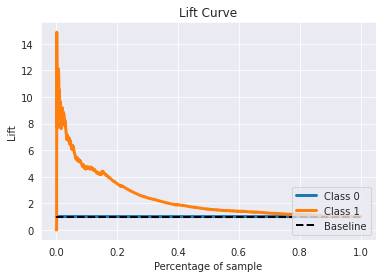

In [ ]:
import sklearn
import scikitplot as skplt

y_probas = rf.predict_proba(X_test)

skplt.metrics.plot_lift_curve(y_test, y_probas)

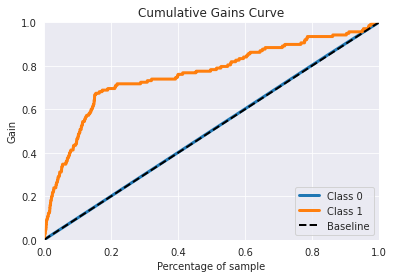

In [ ]:

import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

In [ ]:
from lift_curves import *

ModuleNotFoundError: ignored

In [ ]:
gain_curve(y_test,y_pred_proba,figsize=(10,7))
plt.show()

NameError: ignored

In [ ]:
pip install lift

     |████████████████████████████████| 215kB 8.0MB/s 
     |████████████████████████████████| 962kB 17.9MB/s 
     |████████████████████████████████| 71kB 10.4MB/s 
     |████████████████████████████████| 2.6MB 30.8MB/s 
  Created wheel for lift: filename=lift-2.0.0-cp36-none-any.whl size=23348 sha256=9c617610a9d41cc29619239facdd55f630206a461801a1c5bac9266c97c499da
  Stored in directory: /root/.cache/pip/wheels/9a/a3/f6/f336e401949c3aa69a589c416659a2eacae2c11fea3911eba7
Successfully built lift


In [ ]:
lift_curve(y_test,y_probas,figsize=(10,7))
plt.show()

NameError: ignored

Adjusting probability threshold


In [ ]:
# compute the probabilites of test observations using rf_smote model

y_pred_prob = rf_smote.predict_proba(X_test)[:,1]

In [ ]:
# compare these probabilities against the probability threshold of 6% rather than the default threshold of 50%

y_pred_labels = (y_pred_prob  >= 0.05)

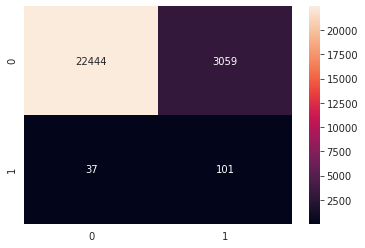

In [ ]:
# plot the confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred_labels), annot = True, fmt= '0.0f')

In [ ]:
# print the classification report
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     25503
           1       0.03      0.73      0.06       138

    accuracy                           0.88     25641
   macro avg       0.52      0.81      0.50     25641
weighted avg       0.99      0.88      0.93     25641



Addon for future


In [ ]:
# roc curve and auc
#  Receiver Operating Characteristic curve
def roc_curve(x_train, x_test, y_train, y_test, model , model_name):
    from sklearn.datasets import make_classification
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    from matplotlib import pyplot


#     # Dividing data into train and test.
#     X = bld.values[:,0:len(bld.columns)-1]
#     Y = bld.values[:,len(bld.columns)-1]

#     # split into train/test sets
#     x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.37,random_state=0)

    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]

    if model_name == "LR Model":
        model = LogisticRegression(solver='lbfgs')
        model.fit(x_train, y_train)

    # predict probabilities
    lr_probs = model.predict_proba(x_test)

    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)

    # summarize scores
    print(model_name, 'No Skill: ROC AUC=%.3f' % (ns_auc))

    print(model_name, ' ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label=model_name)

    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')

    # show the legend
    pyplot.legend()

    # show the plot
    pyplot.show()
    
    return lr_auc

In [ ]:
#Precision Recall Curves
def pr_curve(x_train, x_test, y_train, y_test, model , model_name):
    # precision-recall curve and f1
    from sklearn.datasets import make_classification
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import f1_score
    from sklearn.metrics import auc
    from matplotlib import pyplot
    # fit a model
   
    if model_name == "LR Model":
        model = LogisticRegression(solver='lbfgs')
        model.fit(x_train, y_train)
    
    # predict probabilities
    lr_probs = model.predict_proba(x_test)
    
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    
    # predict class values
    yhat = model.predict(x_test)
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
    lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
    
    # summarize scores
    print(model_name,': f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    
    # plot the precision-recall curves
    no_skill = len(y_test[y_test==1]) / len(y_test)
    if model_name != 'LR Model':
        pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    pyplot.plot(lr_recall, lr_precision, marker='.', label=model_name)
    
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    
    # show the legend
    pyplot.legend()
    
    # show the plot
    pyplot.show()
    
    return lr_auc